**Корректность проверена на Python 3.6:**
+ pandas 0.23.4
+ numpy 1.15.4
+ matplotlib 3.0.2
+ seaborn 0.9.0

# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

Это задание посвящено линейной регрессии. На примере прогнозирования роста человека по его весу Вы увидите, какая математика за этим стоит, а заодно познакомитесь с основными библиотеками Python, необходимыми для дальнейшего прохождения курса.

**Материалы**

- Лекции данного курса по линейным моделям и градиентному спуску
- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib 
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn 

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

**[1].** Если у Вас не установлена библиотека Seaborn - выполните в терминале команду *conda install seaborn*. (Seaborn не входит в сборку Anaconda, но эта библиотека предоставляет удобную высокоуровневую функциональность для визуализации данных).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [2]:
person_data = pd.read_csv("datasets/weights_heights.csv", index_col="Index")

person_data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

**Пример.** Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

<Axes: title={'center': 'Height (inch.) distribution'}, ylabel='Frequency'>

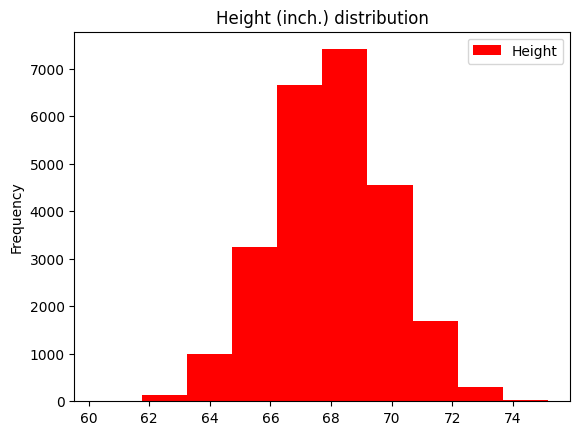

In [3]:
person_data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

<Axes: title={'center': 'Частота встречаемого веса'}, xlabel='Вес в кг', ylabel='Количество записей'>

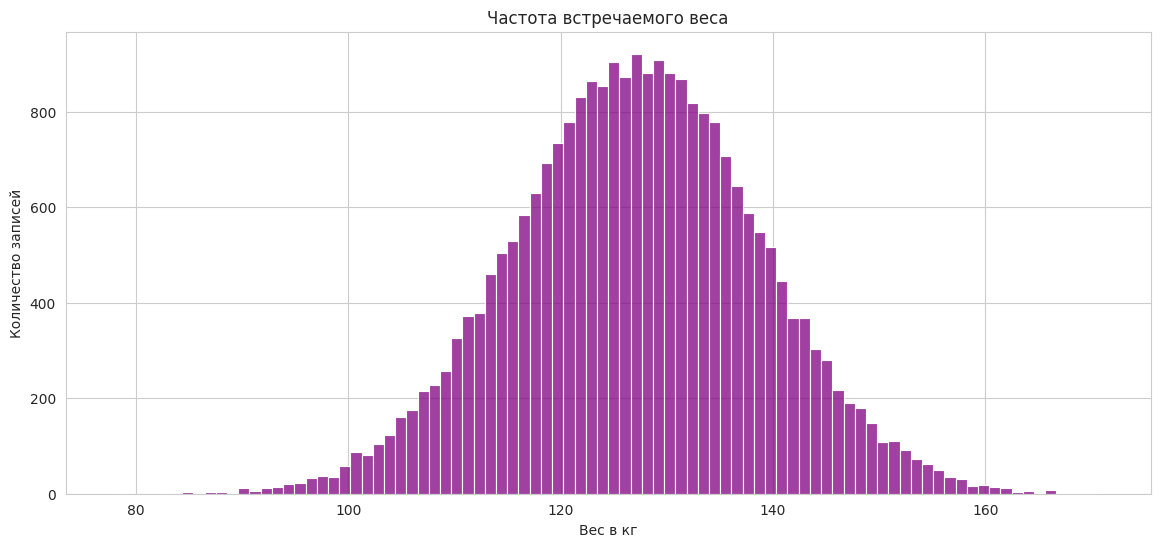

In [38]:
plt.figure(figsize=(14, 6))
plt.title("Частота встречаемого веса")
plt.xlabel("Вес в кг")
plt.ylabel("Количество записей")

sns.set_style("whitegrid")
sns.histplot(data=person_data, x="Weight", color="purple")

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

**[2]**. Посмотрите на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

In [5]:
person_data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<Axes: title={'center': 'Частота встречаемого веса'}, xlabel='Вес в кг', ylabel='Количество записей'>

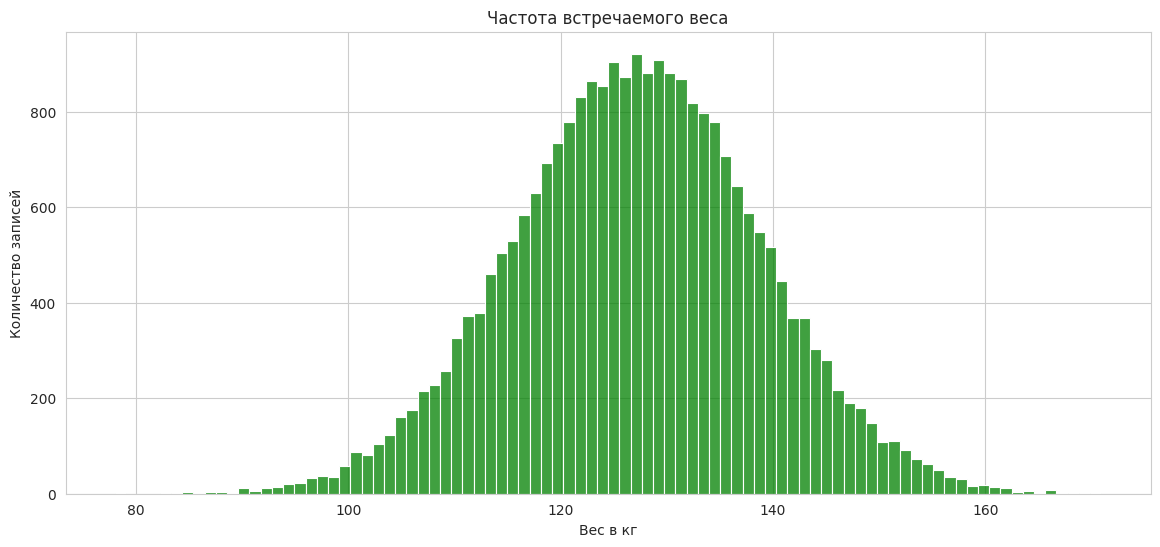

In [39]:
plt.figure(figsize=(14, 6))
plt.title("Частота встречаемого веса")
plt.xlabel("Вес в кг")
plt.ylabel("Количество записей")

sns.set_style("whitegrid")
sns.histplot(data=person_data, x="Weight", color="green")

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [8]:
person_data['BMI'] = person_data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

person_data

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581
...,...,...,...
24996,69.50215,118.0312,17.178982
24997,64.54826,120.1932,20.281866
24998,64.69855,118.2655,19.863971


**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

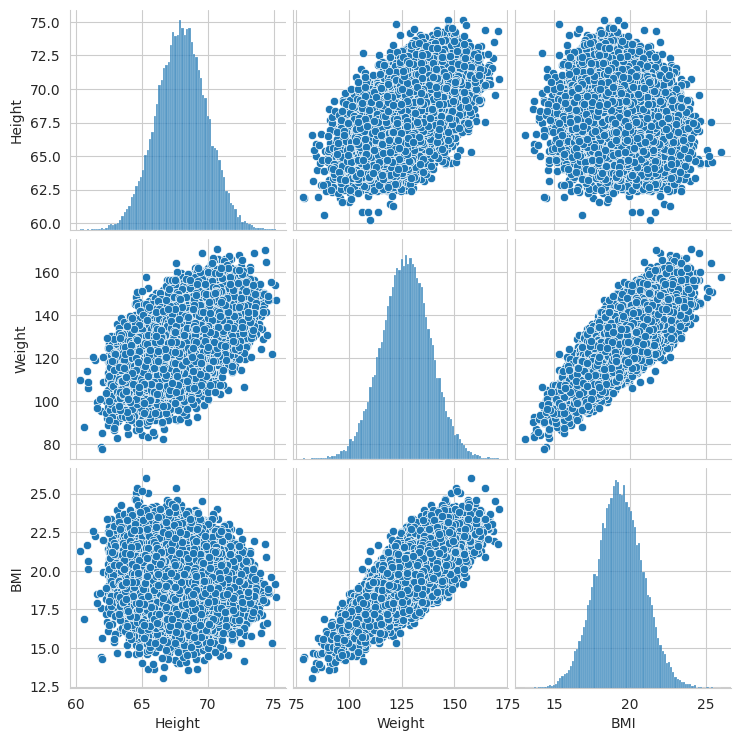

In [9]:
sns.pairplot(data=person_data, diag_kind="hist")

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

<Axes: title={'center': 'boxplot распределения атрибутов'}, ylabel='Значение'>

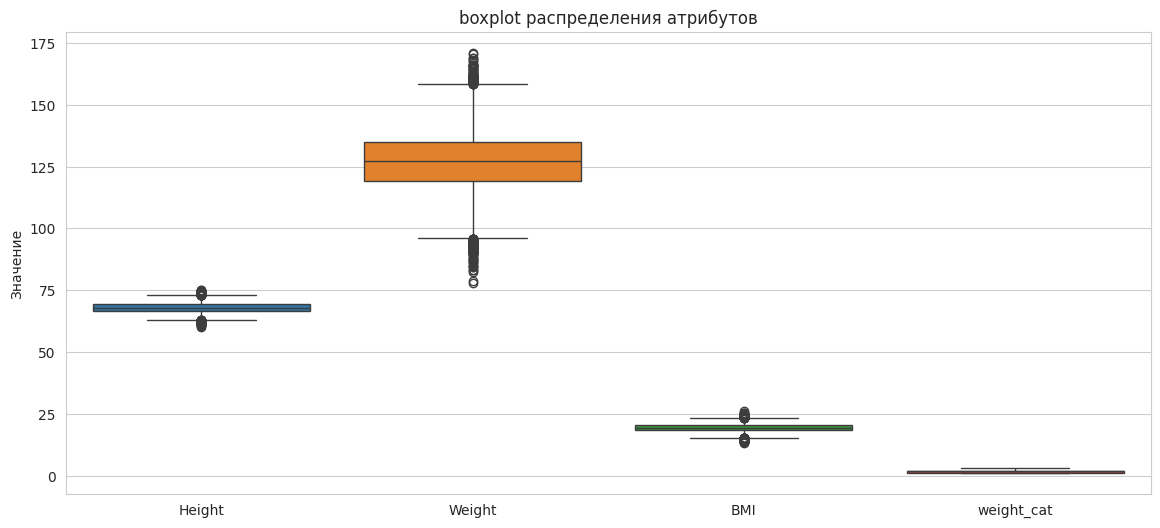

In [10]:
def weight_category(weight):
    if weight < 120:
        return 1
    if weight >= 150:
        return 3

    return 2

person_data['weight_cat'] = person_data['Weight'].apply(weight_category)

plt.figure(figsize=(14, 6))
plt.title("boxplot распределения атрибутов")
plt.ylabel("Значение")

sns.set_style("whitegrid")
sns.boxplot(data=person_data)

**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

<Axes: title={'center': 'boxplot распределения атрибутов'}, xlabel='Рост человека', ylabel='Вес человека'>

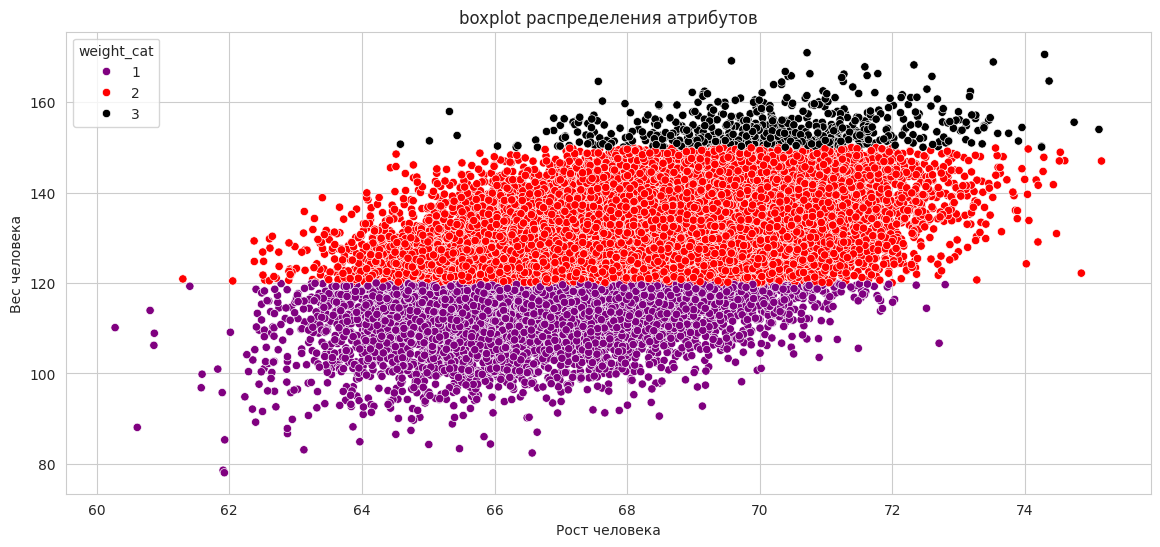

In [11]:
plt.figure(figsize=(14, 6))
plt.title("boxplot распределения атрибутов")
plt.ylabel("Вес человека")
plt.xlabel("Рост человека")

sns.set_style("whitegrid")
sns.scatterplot(data=person_data, x="Height", y="Weight", hue="weight_cat", palette=["purple", "red", "black"])

## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [12]:
def find_mse(w0, w1):
    data_rows = person_data.shape[0] # мб нужно вернуть столбцы
    matrix = np.zeros(data_rows)
    error = (person_data["Height"] - (w0 + w1 * person_data["Weight"])) ** 2

    return error.sum()
    

In [13]:
person_data.shape

(25000, 4)

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

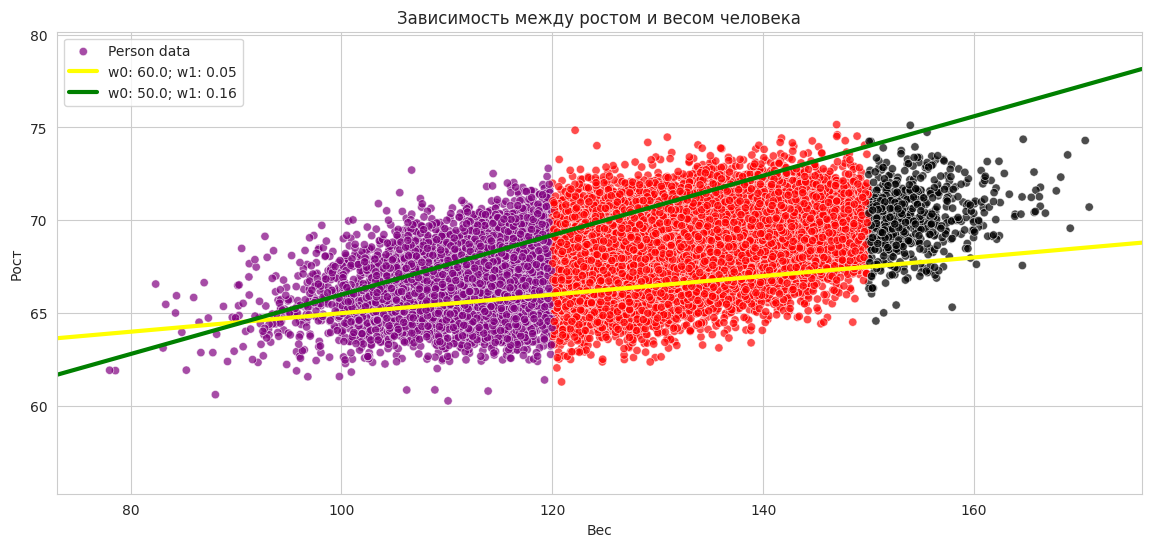

In [14]:
plt.figure(figsize=(14, 6))

# regression func
linear_func = lambda x, w0, w1: w0 + w1 * x

total_points = 200
x_lines = np.linspace(start=person_data["Weight"].min() - 5, 
                      stop=person_data["Weight"].max() + 5, num=total_points)

# data for regression lines
w_lines = np.array( [[60, 0.05], [50, 0.16]] )
lines_rows, lines_cols = w_lines.shape

# fill y axis with values using linear_func
y_lines = np.zeros( (lines_rows, total_points) )
for t in range(lines_rows):
    y_lines[t] = np.array( linear_func(x_lines, w_lines[t, 0], w_lines[t, 1]) )

# color_map for dots
colors = {1: "purple", 2: "red", 3: "black"}

# add persons to graph
plt.scatter(x=person_data["Weight"], y=person_data["Height"], alpha=0.7, 
            color=person_data["weight_cat"].map(colors), edgecolors="white", linewidths=0.5, label="Person data")

# plot ferst and second regression lines
for t in range(lines_rows):
    info = f"w0: {w_lines[t, 0]}; w1: {w_lines[t, 1]}"
    current_color = "yellow" if w_lines[t, 0] == 60 else "green"
    
    plt.plot(x_lines, y_lines[t], linewidth=3.0, label=info, c=current_color)

# add some stuff to graph
plt.title("Зависимость между ростом и весом человека")
plt.axis([person_data["Weight"].min() - 5, person_data["Weight"].max() + 5, 
          person_data["Height"].min() - 5, person_data["Height"].max() + 5])
plt.xlabel("Вес")
plt.ylabel("Рост")
plt.legend()

plt.show()

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


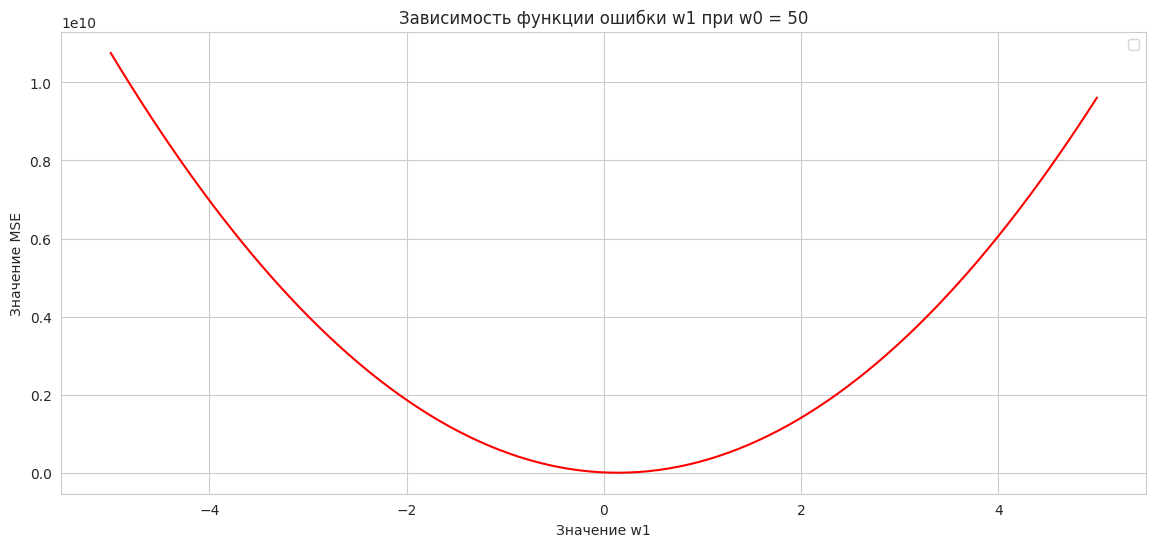

In [15]:
plt.figure(figsize=(14, 6))

total_iters = 100
w1_iters = np.linspace(-5.0, 5.0, total_iters)
w0 = 50

errors_iter_w1 = np.zeros( (total_iters) )
for t in range(total_iters):
    errors_iter_w1[t] = find_mse(w0, w1_iters[t])

plt.plot(w1_iters, errors_iter_w1, color="red")

plt.title("Зависимость функции ошибки w1 при w0 = 50")
plt.xlabel("Значение w1")
plt.ylabel("Значение MSE")
plt.legend()

plt.show()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [16]:
from scipy.optimize import minimize_scalar

optimal_w1_values = minimize_scalar(lambda w: find_mse(w0, w), bounds=[-5, 5])
optimal_w1 = optimal_w1_values.x

print(f"Optimal w1 value for w0={w0} is { round(optimal_w1, 2) }")

Optimal w1 value for w0=50 is 0.14


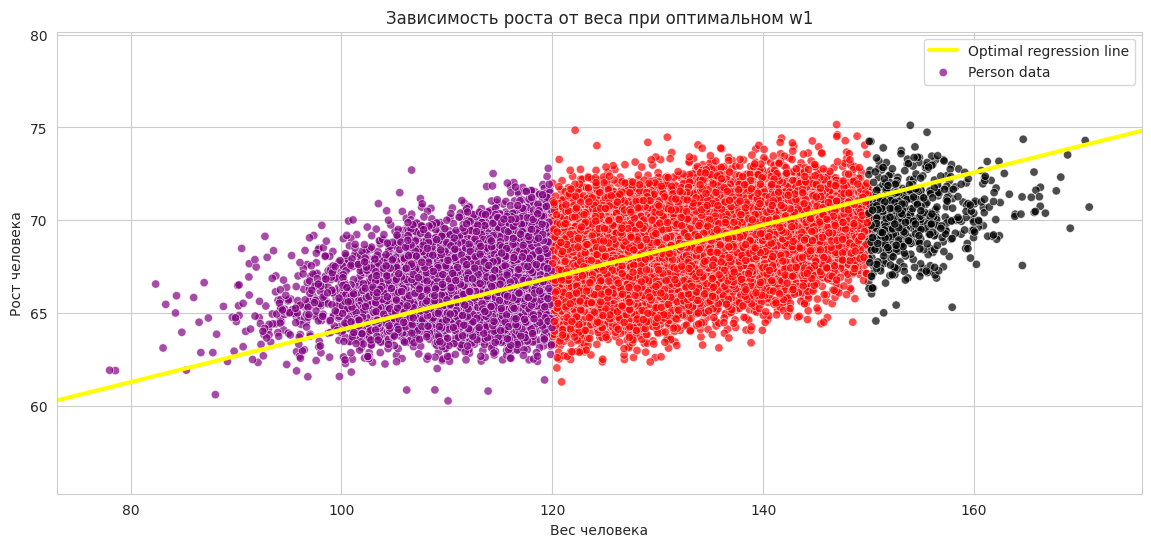

In [17]:
plt.figure(figsize=(14, 6))

optimal_regression_line = np.array( linear_func(x_lines, w0, optimal_w1) )

plt.plot(x_lines, optimal_regression_line, color="yellow", linewidth=3.0, label="Optimal regression line")
plt.scatter(x=person_data["Weight"], y=person_data["Height"], 
            alpha=0.7, color=person_data["weight_cat"].map(colors), 
            edgecolors="white", linewidths=0.5, label="Person data")

plt.axis([person_data["Weight"].min() - 5, person_data["Weight"].max() + 5, 
          person_data["Height"].min() - 5, person_data["Height"].max() + 5])

plt.title("Зависимость роста от веса при оптимальном w1")
plt.xlabel("Вес человека")
plt.ylabel("Рост человека")
plt.legend()

plt.show()

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [18]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

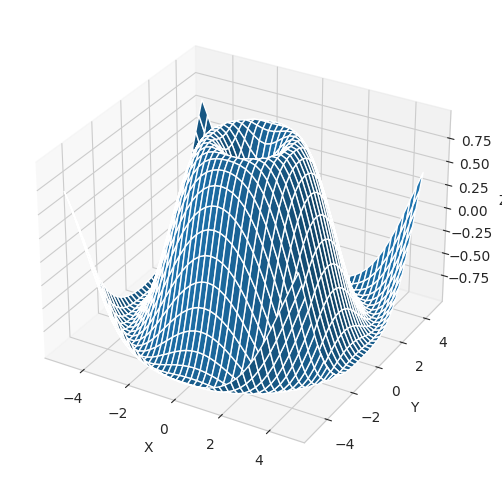

In [19]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

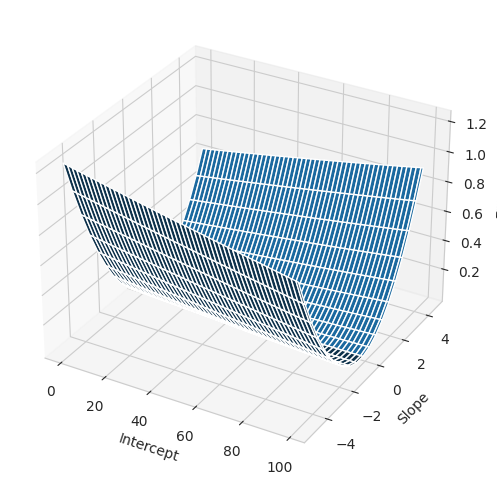

In [31]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(projection="3d")

X = np.arange(0.0, 100.0, 1)
Y = np.arange(-5.0, 5.0, 0.5)
X, Y = np.meshgrid(X, Y)

vector_mse = np.vectorize(find_mse)
Z = np.array(vector_mse(X.ravel(), Y.ravel()))
Z.shape = X.shape

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel("Intercept")
ax.set_ylabel("Slope")
ax.set_zlabel("Error")

plt.show()

**[11].** С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [35]:
from scipy.optimize import minimize

mse_lambda = lambda w: find_mse(w[0], w[1])
bounds = ((-100.0, 100.0), (-5.0, 5.0))
x0 = (0.0, 0.0)
optimal_parametrs = minimize(mse_lambda, x0, bounds=bounds, method="L-BFGS-B")
print(optimal_parametrs)
optimal_w0 = optimal_parametrs.x[0]
optimal_w1 = optimal_parametrs.x[1]

print(f"Optimal parametrs (w0, w1) are: w0 - {optimal_w0}, w1 - {optimal_w1}")

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 67545.28708631505
        x: [ 5.757e+01  8.201e-02]
      nit: 5
      jac: [-1.455e-03 -2.910e-03]
     nfev: 36
     njev: 12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
Optimal parametrs (w0, w1) are: w0 - 57.57178028705942, w1 - 0.08200645837777383


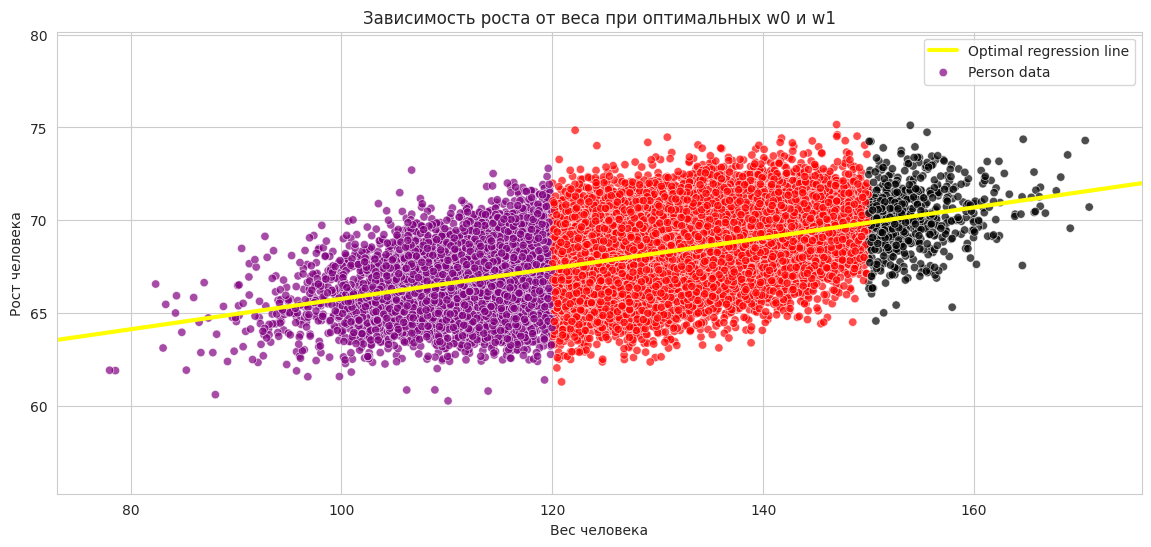

In [37]:
plt.figure(figsize=(14, 6))

optimal_regression_line = np.array( linear_func(x_lines, optimal_w0, optimal_w1) )

plt.plot(x_lines, optimal_regression_line, color="yellow", linewidth=3.0, label="Optimal regression line")
plt.scatter(x=person_data["Weight"], y=person_data["Height"], 
            alpha=0.7, color=person_data["weight_cat"].map(colors), 
            edgecolors="white", linewidths=0.5, label="Person data")

plt.axis([person_data["Weight"].min() - 5, person_data["Weight"].max() + 5, 
          person_data["Height"].min() - 5, person_data["Height"].max() + 5])

plt.title("Зависимость роста от веса при оптимальных w0 и w1")
plt.xlabel("Вес человека")
plt.ylabel("Рост человека")
plt.legend()

plt.show()

## Критерии оценки работы

- Выполняется ли тетрадка IPython без ошибок? (15 баллов)
- Верно ли отображена гистограмма распределения роста из п. 2? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображены попарные зависимости признаков из п. 3? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображена зависимость роста от весовой категории из п. 4? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображен scatter plot роста от веса из п. 5? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Правильно ли реализована функция подсчета квадратичной ошибки из п. 6? (10 баллов)
- Правильно ли нарисован график из п. 7? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован график из п. 8? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize\_scalar из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 9? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован 3D-график из п. 10? (6 баллов) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 11? (3 балла). Правильно ли оформлены подписи? (1 балл)